In [1]:
# Učitavanje potrebnih biblioteka
import pandas as pd

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [2]:
dionice = pd.read_csv('TSLA2019.csv') 
dionice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
1,2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2,2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
3,2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200
4,2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500


In [3]:
 dionice.shape

(252, 7)

In [4]:
dionice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
dionice[dionice['Close'] == dionice['Adj Close']].shape

(252, 7)

In [3]:
dionice = dionice.drop(['Adj Close'], axis=1)
dionice.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-02,306.100006,315.130005,298.799988,310.119995,11658600
1,2019-01-03,307.000000,309.399994,297.380005,300.359985,6965200
2,2019-01-04,306.000000,318.000000,302.730011,317.690002,7394100
3,2019-01-07,321.720001,336.739990,317.750000,334.959991,7551200
4,2019-01-08,341.959991,344.010010,327.019989,335.350006,7008500


In [4]:
splitted = dionice['Date'].str.split('-', expand=True) 

dionice['day'] = splitted[2].astype('int') 
dionice['month'] = splitted[1].astype('int') 
dionice['year'] = splitted[0].astype('int') 

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2019-01-02,306.100006,315.130005,298.799988,310.119995,11658600,2,1,2019
1,2019-01-03,307.000000,309.399994,297.380005,300.359985,6965200,3,1,2019
2,2019-01-04,306.000000,318.000000,302.730011,317.690002,7394100,4,1,2019
3,2019-01-07,321.720001,336.739990,317.750000,334.959991,7551200,7,1,2019
4,2019-01-08,341.959991,344.010010,327.019989,335.350006,7008500,8,1,2019


In [5]:
dionice['kraj_kvartala'] = np.where(dionice['month']%3==0,1,0) 
dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala
0,2019-01-02,306.100006,315.130005,298.799988,310.119995,11658600,2,1,2019,0
1,2019-01-03,307.000000,309.399994,297.380005,300.359985,6965200,3,1,2019,0
2,2019-01-04,306.000000,318.000000,302.730011,317.690002,7394100,4,1,2019,0
3,2019-01-07,321.720001,336.739990,317.750000,334.959991,7551200,7,1,2019,0
4,2019-01-08,341.959991,344.010010,327.019989,335.350006,7008500,8,1,2019,0


In [6]:

# Izračun postotne promjene
dionice['Promjena'] = dionice['Close'].pct_change() * 100


dionice.head

<bound method NDFrame.head of            Date        Open        High         Low       Close    Volume  \
0    2019-01-02  306.100006  315.130005  298.799988  310.119995  11658600   
1    2019-01-03  307.000000  309.399994  297.380005  300.359985   6965200   
2    2019-01-04  306.000000  318.000000  302.730011  317.690002   7394100   
3    2019-01-07  321.720001  336.739990  317.750000  334.959991   7551200   
4    2019-01-08  341.959991  344.010010  327.019989  335.350006   7008500   
..          ...         ...         ...         ...         ...       ...   
247  2019-12-24  418.359985  425.470001  412.690002  425.250000   8054700   
248  2019-12-26  427.910004  433.480011  426.350006  430.940002  10633900   
249  2019-12-27  435.000000  435.309998  426.109985  430.380005   9945700   
250  2019-12-30  428.790009  429.000000  409.260010  414.700012  12586400   
251  2019-12-31  405.000000  421.290009  402.079987  418.329987  10285700   

     day  month  year  kraj_kvartala  Promjen

In [7]:
dionice['open-close'] = dionice['Open'] - dionice['Close'] 
dionice['low-high'] = dionice['Low'] - dionice['High'] 


dionice['Kupiti'] = np.where(dionice['Close'].shift(-1) > dionice['Close'], 1, 0)

dionice.head()

,Date,Open,High,Low,Close,Volume,day,month,year,kraj_kvartala,Promjena,open-close,low-high,Kupiti
0,2019-01-02,306.100006,315.130005,298.799988,310.119995,11658600,2,1,2019,0,NaN,-4.019989,-16.330017,0
1,2019-01-03,307.000000,309.399994,297.380005,300.359985,6965200,3,1,2019,0,-3.147172,6.640015,-12.019989,1
2,2019-01-04,306.000000,318.000000,302.730011,317.690002,7394100,4,1,2019,0,5.769749,-11.690002,-15.269989,1
3,2019-01-07,321.720001,336.739990,317.750000,334.959991,7551200,7,1,2019,0,5.436113,-13.239990,-18.989990,1
4,2019-01-08,341.959991,344.010010,327.019989,335.350006,7008500,8,1,2019,0,0.116436,6.609985,-16.990021,1


In [8]:
dionice = dionice.drop(['Date'], axis=1)
dionice = dionice.drop(['day'], axis=1)
dionice = dionice.drop(['month'], axis=1)
dionice = dionice.drop(['year'], axis=1)

dionice = dionice.drop(['Open'], axis=1)
dionice = dionice.drop(['High'], axis=1)
dionice = dionice.drop(['Low'], axis=1)
#dionice = dionice.drop(['open-close'], axis=1)
dionice = dionice.drop(['Close'], axis=1)

dionice = dionice.drop(['Volume'], axis=1)

dionice.drop(index=dionice.index[0], axis=0, inplace=True)


dionice.head()


,kraj_kvartala,Promjena,open-close,low-high,Kupiti
1,0,-3.147172,6.640015,-12.019989,1
2,0,5.769749,-11.690002,-15.269989,1
3,0,5.436113,-13.239990,-18.989990,1
4,0,0.116436,6.609985,-16.990021,1
5,0,0.948261,-3.029999,-12.029999,1


In [9]:
y1 = dionice.iloc[:,-1]
y1.shape

(251,)

In [10]:
X1 = dionice.iloc[:,:-1]
X1.shape

(251, 4)

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 0)

In [12]:
X_train1.shape

(188, 4)

In [13]:
X_test1.shape

(63, 4)

In [14]:
y_train1.shape

(188,)

In [15]:
y_test1.shape

(63,)

In [16]:
dionice.head()

,kraj_kvartala,Promjena,open-close,low-high,Kupiti
1,0,-3.147172,6.640015,-12.019989,1
2,0,5.769749,-11.690002,-15.269989,1
3,0,5.436113,-13.239990,-18.989990,1
4,0,0.116436,6.609985,-16.990021,1
5,0,0.948261,-3.029999,-12.029999,1


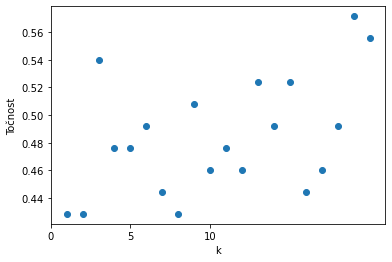

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,21)
scores = []

for k in k_range:
    knn_class = KNeighborsClassifier(n_neighbors = k)
    knn_class.fit(X_train1, y_train1)
    scores.append(knn_class.score(X_test1, y_test1))

plt.figure()
plt.xlabel('k')
plt.ylabel('Točnost')
plt.scatter(k_range, scores)
plt.xticks([0,5,10]);

In [18]:
knn_class = KNeighborsClassifier(n_neighbors = 19)

knn_class.fit(X_train1, y_train1)

print(knn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.3f}'.format(knn_class.score(X_test1, y_test1)))

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1]
Točnost na skupu za testiranje: 0.571


In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train1, y_train1)

print(log_reg.predict(X_test1))

print('Točnost: {:.3f}'.format(log_reg.score(X_test1, y_test1)))

[1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0]
Točnost: 0.444


In [20]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[0.34300911 0.08202826 0.02585067 0.00846936]]
[0.07040945]


In [21]:
from sklearn.neural_network import MLPClassifier

nn_class = MLPClassifier(hidden_layer_sizes = [100, 100], random_state = 0, solver='lbfgs')

nn_class.fit(X_train1, y_train1)

print(nn_class.predict(X_test1))

print('Točnost na skupu za testiranje: {:.2f}'.format(nn_class.score(X_test1, y_test1)))

[1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1]
Točnost na skupu za testiranje: 0.54


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [22]:
matrica_konfuzije1 = pd.crosstab(knn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije1)

matrica_konfuzije2 = pd.crosstab(log_reg.predict(X_test1), y_test1.values)
print(matrica_konfuzije2)

matrica_konfuzije3 = pd.crosstab(nn_class.predict(X_test1), y_test1.values)
print(matrica_konfuzije3)

col_0   0   1
row_0        
0      10   7
1      20  26
col_0   0   1
row_0        
0       7  12
1      23  21
col_0   0   1
row_0        
0      12  11
1      18  22


In [23]:
# Odaziv (osjetljivost, omjer točno pozitivnih) = TP / (TP + FN)
print('Stopa odaziva za sve klasifikatore: {:.2f}'.format(7/(7+0)))

# Preciznost = TP / (TP + FP)
print('Preciznost za kNN: {:.2f}'.format(7/(7+1)))
print('Preciznost za logističku regresiju i neuronsku mrežu:: {:.2f}'.format(7/(7+2)))

Stopa odaziva za sve klasifikatore: 1.00
Preciznost za kNN: 0.88
Preciznost za logističku regresiju i neuronsku mrežu:: 0.78


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Stopa odaziva:
print('Stopa odaziva za kNN: {:.2f}'.format(recall_score(y_test1, knn_class.predict(X_test1))))
print('Stopa odaziva za logističku regresiju i neuronsku mrežu: {:.2f}'.format(recall_score(y_test1, nn_class.predict(X_test1))))

# Preciznost
print('Preciznost za kNN: {:.2f}'.format(precision_score(y_test1, knn_class.predict(X_test1))))
print('Preciznost za logističku regresiju i neuronsku mrežu: {:.2f}'.format(precision_score(y_test1, nn_class.predict(X_test1))))

Stopa odaziva za kNN: 0.79
Stopa odaziva za logističku regresiju i neuronsku mrežu: 0.67
Preciznost za kNN: 0.57
Preciznost za logističku regresiju i neuronsku mrežu: 0.55
